In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("loan_data_final.csv")

In [3]:
data.head()

,politique_de_credit,objet__du_pret,taux_interet,mensualité,revenu_annuel_log,ratio_endettement,score_credit,duree_ligne_credit,solde_renouvelable,taux_utilisation_credit,demandes_credit_6_mois,incidents_paiement_2_ans,dossiers_publics_derogatoires,pret_non_remboursé
0,oui,consolidation_dettes,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,non
1,oui,carte_crédit,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,non
2,oui,consolidation_dettes,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,non
3,oui,consolidation_dettes,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,non
4,oui,carte_crédit,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,non


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   politique_de_credit            9578 non-null   object 
 1   objet__du_pret                 9578 non-null   object 
 2   taux_interet                   9578 non-null   float64
 3   mensualité                     9578 non-null   float64
 4   revenu_annuel_log              9578 non-null   float64
 5   ratio_endettement              9578 non-null   float64
 6   score_credit                   9578 non-null   int64  
 7   duree_ligne_credit             9578 non-null   float64
 8   solde_renouvelable             9578 non-null   int64  
 9   taux_utilisation_credit        9578 non-null   float64
 10  demandes_credit_6_mois         9578 non-null   int64  
 11  incidents_paiement_2_ans       9578 non-null   int64  
 12  dossiers_publics_derogatoires  9578 non-null   i

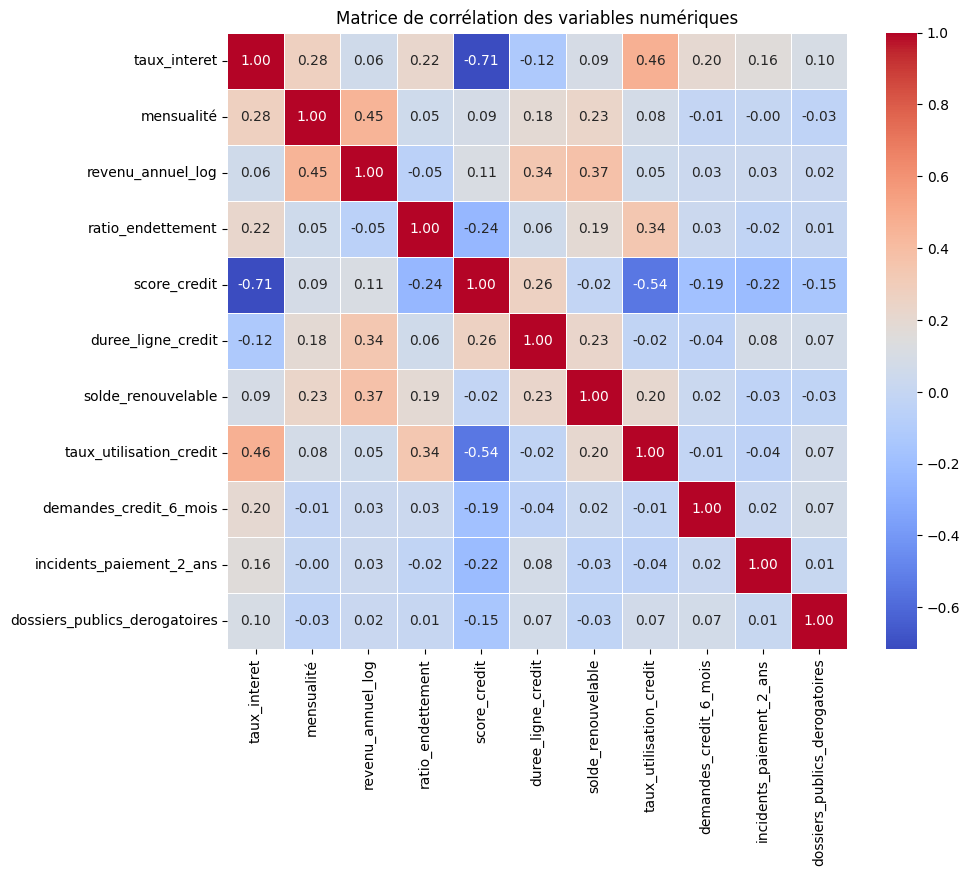

In [5]:

# Sélectionner les colonnes numériques
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation des variables numériques')
plt.show()


Corrélations Positives Fortes
Mensualité et Taux d'intérêt (0.96) : Les prêts avec des mensualités plus élevées ont généralement des taux d'intérêt plus élevés.
Dossier public dérogatoire et Incidents de paiement (0.61) : Les clients ayant des incidents de paiement au cours des 2 dernières années ont également tendance à avoir des dossiers publics dérogatoires.
Corrélations Négatives Fortes
Score de crédit et Taux d'intérêt (-0.74) : Les clients ayant un score de crédit élevé ont tendance à bénéficier de taux d'intérêt plus bas.
Score de crédit et Ratio d'endettement (-0.56) : Les clients avec un score de crédit plus élevé ont souvent un ratio d'endettement plus bas.
Ces corrélations montrent des relations significatives qui pourraient être importantes pour le modèle de classification. Les corrélations positives et négatives identifiées pourraient aider à comprendre les interactions entre les différentes variables, ce qui pourrait influer sur la performance du modèle prédictif.

In [6]:
# Sélection de la colonne de segmentation "objet__du_pret"
data_objective = data['objet__du_pret']

# Calculer les matrices de corrélation pour chaque objectif de prêt
correlation_par_objectif = {}

for objectif in data_objective.unique():
    segment = numeric_columns[data_objective == objectif]
    correlation_par_objectif[objectif] = segment.corr()

# Calculer les différences de corrélation entre les objectifs de prêt
correlation_changes = {}

for objectif, corr_matrix in correlation_par_objectif.items():
    diff = corr_matrix - correlation_matrix
    correlation_changes[objectif] = diff.abs().mean().mean()  # Moyenne des différences absolues

# Convertir les résultats en DataFrame
variation_df = pd.DataFrame.from_dict(correlation_changes, orient='index', columns=['Variation Moyenne'])
variation_df = variation_df.sort_values(by='Variation Moyenne', ascending=False)

# Afficher le tableau
print(variation_df)


                      Variation Moyenne
achat_important                0.049025
travaux_maison                 0.046564
éducation                      0.044641
petite_entreprise              0.041621
carte_crédit                   0.022147
autres                         0.022031
consolidation_dettes           0.019641


Ces chiffres montrent que les emprunteurs qui prennent un prêt pour un "achat important" ont des profils financiers plus divers ou des comportements plus variables que ceux qui empruntent pour d'autres raisons. Cela pourrait suggérer que pour mieux évaluer le risque de ces prêts, on pourrait avoir besoin de regarder différemment les informations, voire utiliser un modèle spécifique pour ce type de prêt.

In [7]:
# Filtrer les corrélations significatives (positives ou négatives)
significant_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

# Supprimer les valeurs NaN pour obtenir uniquement les corrélations significatives
significant_correlations = significant_correlations.dropna(how='all').dropna(axis=1, how='all')

# Convertir la matrice en tableau pour une lecture plus facile
significant_correlations_table = significant_correlations.stack().reset_index()
significant_correlations_table.columns = ['Variable 1', 'Variable 2', 'Correlation']
significant_correlations_table = significant_correlations_table[significant_correlations_table['Variable 1'] != significant_correlations_table['Variable 2']]

# Afficher le tableau
print(significant_correlations_table)

                 Variable 1               Variable 2  Correlation
1              taux_interet             score_credit    -0.714821
5              score_credit             taux_interet    -0.714821
7              score_credit  taux_utilisation_credit    -0.541289
10  taux_utilisation_credit             score_credit    -0.541289


Ces corrélations sont importantes à considérer pour la modélisation, car elles montrent des relations significatives qui peuvent influencer les prédictions du modèle. Par exemple, le score de crédit pourrait être une variable particulièrement importante pour prédire si un prêt sera remboursé, car il est fortement lié à plusieurs autres variables clés.

Inclure le score de crédit comme une variable importante dans le modèle, car il est fortement corrélé avec des aspects critiques du prêt (taux d'intérêt, utilisation du crédit).
Gérer la multicolinéarité : étant donné la forte corrélation entre certaines variables, il pourrait être nécessaire de contrôler la multicolinéarité dans le modèle, par exemple en utilisant des techniques de régularisation ou en réduisant la dimensionnalité avec des méthodes comme l'Analyse en Composantes Principales (PCA).

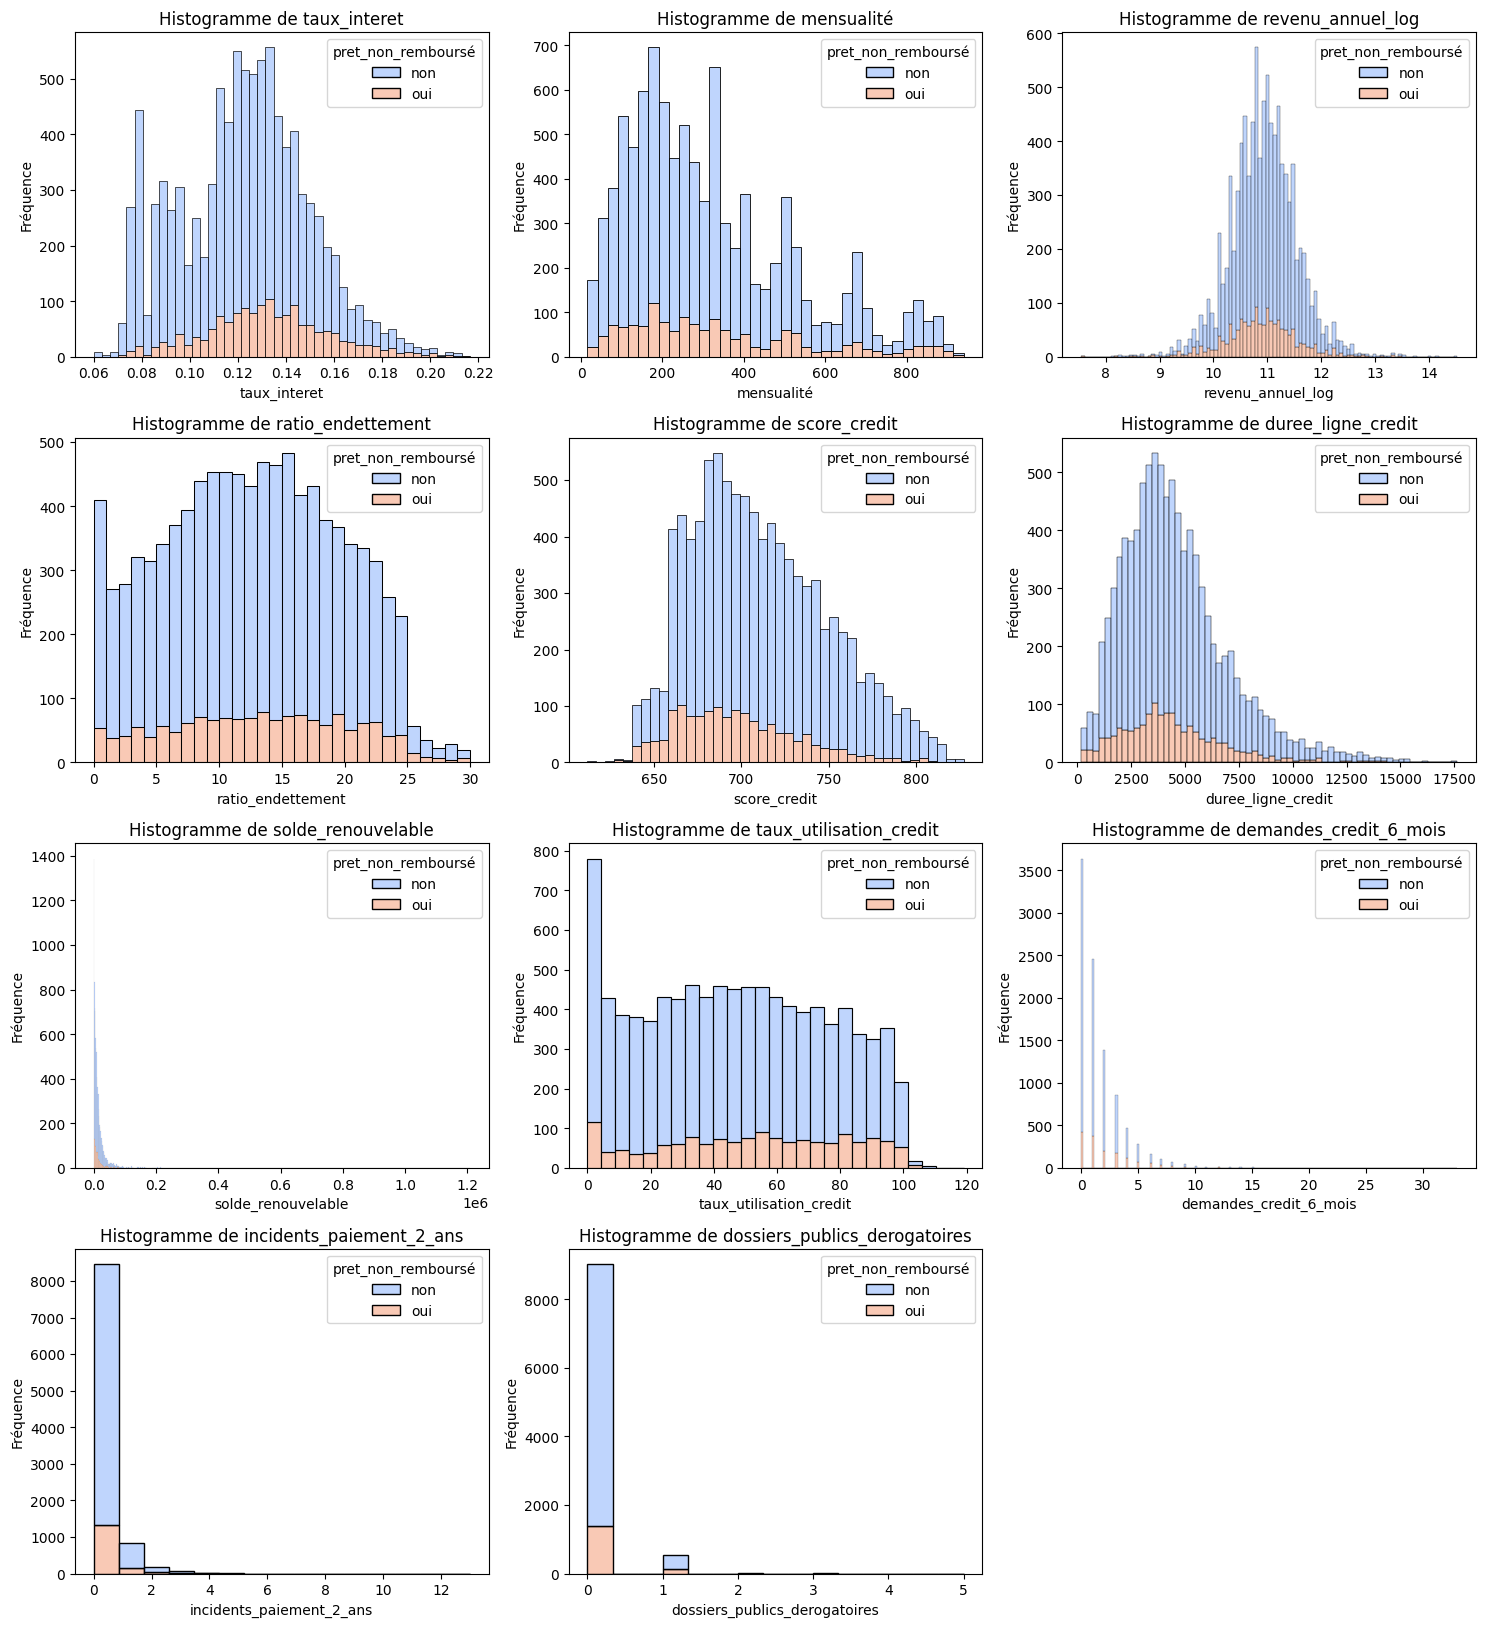

In [8]:
# Sélectionner les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_data.columns

# Afficher les histogrammes des variables numériques
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data, x=column, hue='pret_non_remboursé', kde=False, multiple="stack", palette="coolwarm")
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder

# Copier les données pour ne pas modifier l'original
data_encoded = data.copy()

# Créer un encodeur de label
label_encoder = LabelEncoder()

# Encodage des colonnes catégorielles
data_encoded['objet__du_pret'] = label_encoder.fit_transform(data_encoded['objet__du_pret'])
data_encoded['politique_de_credit'] = label_encoder.fit_transform(data_encoded['politique_de_credit'])

# Affichage des premières lignes des données encodées
data_encoded.head()


,politique_de_credit,objet__du_pret,taux_interet,mensualité,revenu_annuel_log,ratio_endettement,score_credit,duree_ligne_credit,solde_renouvelable,taux_utilisation_credit,demandes_credit_6_mois,incidents_paiement_2_ans,dossiers_publics_derogatoires,pret_non_remboursé
0,1,3,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,non
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,non
2,1,3,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,non
3,1,3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,non
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,non


In [10]:
# Séparation des données en features (X) et target (y)
X = data_encoded.drop(columns=['pret_non_remboursé'])
y = data_encoded['pret_non_remboursé']

# Vérification des dimensions et de la structure des features et de la target
print("\nDimensions des features (X) :", X.shape)
print("Dimensions de la target (y) :", y.shape)
print("\nAperçu des features (X) :")
print(X.head())
print("\nAperçu de la target (y) :")
print(y.value_counts())



Dimensions des features (X) : (9578, 13)
Dimensions de la target (y) : (9578,)

Aperçu des features (X) :
   politique_de_credit  objet__du_pret  taux_interet  mensualité  \
0                    1               3        0.1189      829.10   
1                    1               2        0.1071      228.22   
2                    1               3        0.1357      366.86   
3                    1               3        0.1008      162.34   
4                    1               2        0.1426      102.92   

   revenu_annuel_log  ratio_endettement  score_credit  duree_ligne_credit  \
0          11.350407              19.48           737         5639.958333   
1          11.082143              14.29           707         2760.000000   
2          10.373491              11.63           682         4710.000000   
3          11.350407               8.10           712         2699.958333   
4          11.299732              14.97           667         4066.000000   

   solde_renouvelable

In [11]:
print("Distribution des classes dans l'ensemble de données complet :")
print(y.value_counts())

Distribution des classes dans l'ensemble de données complet :
pret_non_remboursé
non    8045
oui    1533
Name: count, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

# Séparation en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des distributions des classes
print("Distribution des classes dans l'ensemble d'entraînement :")
print(y_train.value_counts())

print("Distribution des classes dans l'ensemble de test :")
print(y_test.value_counts())


Distribution des classes dans l'ensemble d'entraînement :
pret_non_remboursé
non    6436
oui    1226
Name: count, dtype: int64
Distribution des classes dans l'ensemble de test :
pret_non_remboursé
non    1609
oui     307
Name: count, dtype: int64


In [13]:
import pandas as pd
from sklearn.utils import resample

# Conversion des valeurs 'oui' et 'non' en 1 et 0
y_train = y_train.map({'oui': 1, 'non': 0})
y_test = y_test.map({'oui': 1, 'non': 0})

# Combiner X_train et y_train pour faciliter le sur-échantillonnage
train_data = pd.concat([X_train, y_train], axis=1)

# Vérifier les valeurs uniques après conversion
print("Valeurs uniques dans la colonne 'pret_non_remboursé' après conversion :")
print(train_data['pret_non_remboursé'].unique())

# Séparer les classes majoritaire et minoritaire
majority_class = train_data[train_data['pret_non_remboursé'] == 0]
minority_class = train_data[train_data['pret_non_remboursé'] == 1]

# Vérifier les tailles des classes avant sur-échantillonnage
print("\nTaille de la classe majoritaire (remboursé) :", len(majority_class))
print("Taille de la classe minoritaire (non remboursé) :", len(minority_class))

# Sur-échantillonner la classe minoritaire si elle est présente
if not minority_class.empty:
    minority_class_upsampled = resample(minority_class,
                                        replace=True,  # Sur-échantillonnez avec remplacement
                                        n_samples=len(majority_class),  # Faire correspondre la taille de la classe majoritaire
                                        random_state=42)

    # Combiner les classes sur-échantillonnées et majoritaires
    train_data_balanced = pd.concat([majority_class, minority_class_upsampled])

    # Séparer à nouveau X et y
    X_train_balanced = train_data_balanced.drop('pret_non_remboursé', axis=1)
    y_train_balanced = train_data_balanced['pret_non_remboursé']

    # Vérification de la nouvelle distribution après sur-échantillonnage
    print("\nDistribution des classes après sur-échantillonnage :")
    print(y_train_balanced.value_counts())
else:
    print("Erreur : La classe minoritaire est absente dans l'ensemble d'entraînement.")


Valeurs uniques dans la colonne 'pret_non_remboursé' après conversion :
[0 1]

Taille de la classe majoritaire (remboursé) : 6436
Taille de la classe minoritaire (non remboursé) : 1226

Distribution des classes après sur-échantillonnage :
pret_non_remboursé
0    6436
1    6436
Name: count, dtype: int64


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Entraîner le modèle avec les données équilibrées
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Affichage des résultats
print("Matrice de confusion :")
print(conf_matrix)
print("\nRapport de classification :")
print(class_report)
print("\nScore AUC ROC :")
print(roc_auc)


Matrice de confusion :
[[1574   35]
 [ 288   19]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1609
           1       0.35      0.06      0.11       307

    accuracy                           0.83      1916
   macro avg       0.60      0.52      0.51      1916
weighted avg       0.77      0.83      0.78      1916


Score AUC ROC :
0.5200683047110817
